In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")

#explore data set
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [13]:
#create subset with year/production
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


In [21]:
#create X as year
X = prod_per_year['year']
#reshaping for scikit learn
X = X.values.reshape(-1,1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


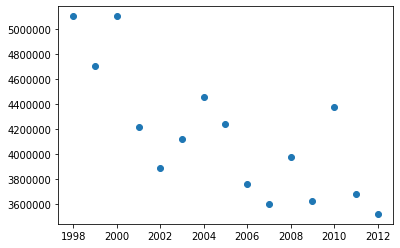

In [22]:
#create y as production
y = prod_per_year['totalprod']
print(y)

#scatter plot
plt.scatter(X,y)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [8]:
#scikit model for linear regression
regr = linear_model.LinearRegression()

#fitting
regr.fit(X, y)

#slope and intercept
print(regr.coef_)
print(regr.intercept_)

[-88303.18915238]
181208083.10732976


In [9]:
#prediction
y_predict = regr.predict(X)
print(y_predict)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


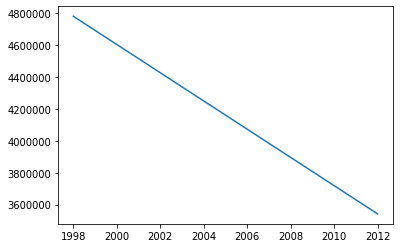

In [19]:
#plotting prediction
plt.plot(X, y_predict)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829
 2747337.8303659  2659034.64121351 2570731.45206112 2482428.26290876
 2394125.07375637 2305821.88460398 2217518.69545159 2129215.50629923
 2040912.31714684 1952609.12799445 1864305.93884209 1776002.7496897
 1687699.56053731 1599396.37138492 1511093.18223256 1422789.99308017
 1334486.80392778 1246183.61477539 1157880.42562303 1069577.23647064
  981274.04731825  892970.85816586  804667.6690135   716364.47986111
  628061.29070872  539758.10155633  451454.91240397  363151.72325158
  274848.53409919]


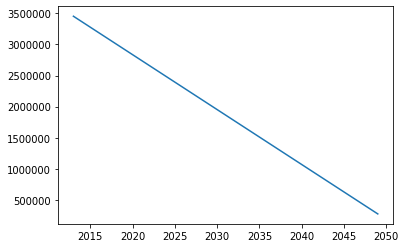

In [20]:
#find out what honey prod will be in 2050
X_future = np.array(range(2013,2050))
X_future = X_future.reshape(-1,1)
future_predict = regr.predict(X_future)

print(future_predict)

#plotting future honey production
plt.plot(X_future, future_predict)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()